In [1]:
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
header = ['Length',  'Redundancy',  'Number of examples',  'To learn',  'Learned',  'With mistake',  'Imprecise',  'Excepted']

pandas_result = pd.read_csv('pandas.csv', lineterminator=';')
polars_result = pd.read_csv('polars.csv', lineterminator=';')
spark_result = pd.read_csv('spark.csv', lineterminator=';')

pandas_result.columns = header
polars_result.columns = header
spark_result.columns = header

In [36]:
for df in [pandas_result, polars_result, spark_result]:
    df['Learned ratio'] = (df['Learned'] / df['To learn']).round(2)
    df['Mistakes to all'] = (df['With mistake'] / df['To learn']).round(2)
    df['Imprecise to all'] = (df['Imprecise'] / df['To learn']).round(2)

pandas_result.to_latex('pandas.tex', index=False, escape = False, header=['\\rotatebox{90}{' + c + '}' for c in pandas_result.columns])
polars_result.to_latex('polars.tex', index=False, escape = False, header=['\\rotatebox{90}{' + c + '}' for c in polars_result.columns])
spark_result.to_latex('spark.tex', index=False, escape = False, header=['\\rotatebox{90}{' + c + '}' for c in spark_result.columns])

/var/folders/pq/9pks_cwx6ndb681g1jcg3dd80000gn/T/ipykernel_1231/1269401162.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pandas_result.to_latex('pandas.tex', index=False, escape = False, header=['\\rotatebox{90}{' + c + '}' for c in pandas_result.columns])
/var/folders/pq/9pks_cwx6ndb681g1jcg3dd80000gn/T/ipykernel_1231/1269401162.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  polars_result.to_latex('polars.tex', index=False, escape = False, header=['\\rotatebox{9

   Length    Pandas     Spark  Polars
0       1  1.000000  1.000000    0.86
1       2  0.955000  1.000000     NaN
2       4  0.866667  0.900000     NaN
3       6  0.800000  0.826667    0.81


<AxesSubplot: xlabel='Length', ylabel='Learned rules to rules in the trainings set ratio'>

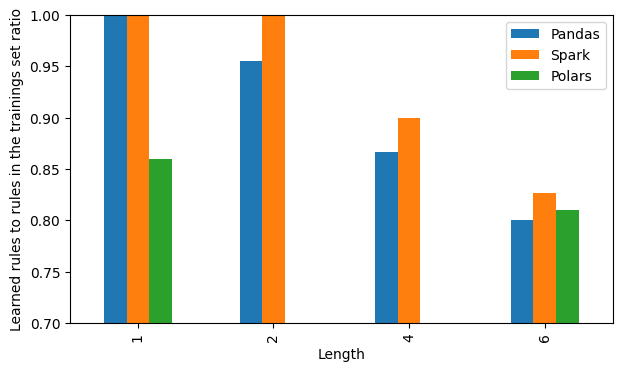

In [34]:
ratio_to_length_mean = pd.DataFrame({})
ratio_to_length_mean['Length'] = pandas_result['Length'].unique()
ratio_to_length_mean = ratio_to_length_mean.join(pandas_result.groupby('Length')['Learned ratio'].mean(), on='Length' ).rename(columns={'Learned ratio': 'Pandas'})
ratio_to_length_mean = ratio_to_length_mean.join(spark_result.groupby('Length')['Learned ratio'].mean(), on='Length' ).rename(columns={'Learned ratio': 'Spark'})
ratio_to_length_mean = ratio_to_length_mean.join(polars_result.groupby('Length')['Learned ratio'].mean(), on='Length' ).rename(columns={'Learned ratio': 'Polars'})
print(ratio_to_length_mean)
ratio_to_length_mean.plot(x='Length', y=['Pandas', 'Spark', 'Polars'], kind='bar', figsize=(7, 4), ylim=(0.7, 1.0), ylabel='Learned rules to rules in the trainings set ratio')

   Redundancy    Pandas  Polars  Spark
0         1.0  0.840000    0.71  0.770
2         1.5  0.805000    0.86  0.935
1         2.0  0.926667    0.86  1.000


<AxesSubplot: xlabel='Redundancy', ylabel='Learned rules to rules in the trainings set ratio'>

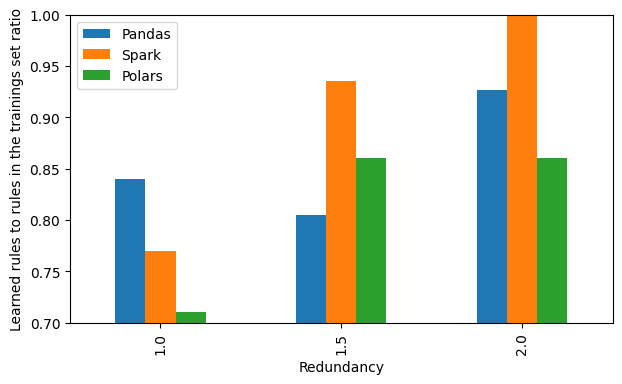

In [35]:
ratio_to_red_mean = pd.DataFrame({})
ratio_to_red_mean['Redundancy'] = pandas_result['Redundancy'].unique()
ratio_to_red_mean = ratio_to_red_mean.join(pandas_result[pandas_result['Length'] > 1.0].groupby('Redundancy')['Learned ratio'].mean(), on='Redundancy' ).rename(columns={'Learned ratio': 'Pandas'})
ratio_to_red_mean = ratio_to_red_mean.join(polars_result[polars_result['Length'] > 1.0].groupby('Redundancy')['Learned ratio'].mean(), on='Redundancy' ).rename(columns={'Learned ratio': 'Polars'})
ratio_to_red_mean = ratio_to_red_mean.join(spark_result[spark_result['Length'] > 1.0].groupby('Redundancy')['Learned ratio'].mean(), on='Redundancy' ).rename(columns={'Learned ratio': 'Spark'})
ratio_to_red_mean = ratio_to_red_mean.sort_values(by='Redundancy')
print(ratio_to_red_mean)

ratio_to_red_mean.plot(x='Redundancy', y=['Pandas', 'Spark', 'Polars'], kind='bar', figsize=(7, 4), ylim=(0.7, 1.0), ylabel='Learned rules to rules in the trainings set ratio')